In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score

계층 클러스터링(Hierarchical Clustering) 알고리즘은 데이터 간 계층을 기반으로 데이터 간 병합 또는 분할을 통해서 해당 데이터 포인트가 속할 그룹을 결정한다. 계층 클러스터링은 크게 병합 계층 클러스터링(Agglomerative Hierarchical Clustering)과 분할 계층 클러스터링(Division Hierarchical Clustering)으로 나눌 수 있다.

병합 계층 클러스터링은 개별 데이터 포인트를 하나의 클러스터로 설정하고 시작하는 방법으로 데이터 포인트가 100개가 있다면 100개의 클러스터가 존재한다고 설정하는 것이다. 그리고 각 클러스터를 비교해서 클러스터간 유사도가 높을 경우 두 개의 클러스터를 하나의 클러스터로 합치는 방법이다. 처음에는 다수의 클러스터로 시작하지만 결국에는 데이터 셋 전체가 하나의 클러스터로 묶이는 방법이다.

분할 계층 클러스터링은 병합 계층 클러스터링과는 반대로 전체 데이터 셋을 하나의 클러스터로 설정하고 시작하는 방법으로 데이터 포인트가 100개가 있다면 이 데이터 셋 전체를 1개의 클러스터라고 설정하는 것이다. 그리고 클러스터 내부에서 가장 멀리 떨어진 데이터 포인트를 다른 클러스트로 분리하는 방법이다. 처음에는 하나의 클러스트로 시작하지만 결국에는 클러스터가 데이터 포인트의 개수만큼 분리되는 방법이다.

계층 클러스터링 알고리즘을 활용해서 주어진 데이터를 클러스터링 해본다.

데이터 불러오기

In [2]:
# 클러스터링용 가상 데이터를 불러온다.
x_train, y_train = datasets.make_blobs(n_samples=100, n_features=2, random_state=10, centers=6)
print(x_train.shape, y_train.shape)

(100, 2) (100,)


클러스터링 되지 않은 데이터 시각화

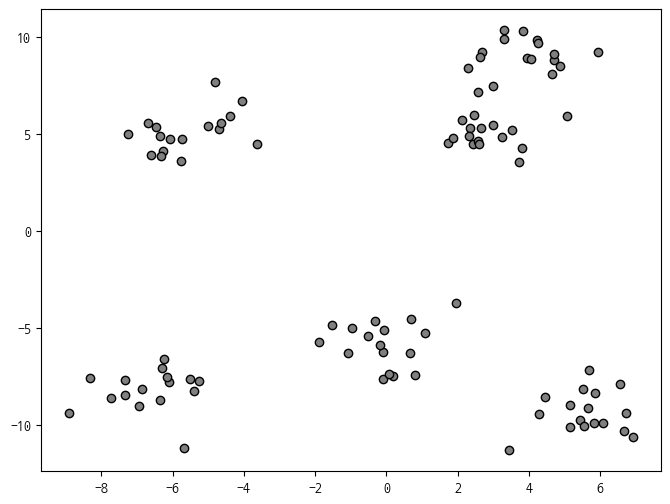

In [3]:
plt.figure(figsize=[8, 6])
plt.scatter(x_train[:, 0], x_train[:, 1], c='gray', edgecolors='black', marker='o')
plt.show()

병합 계층 클러스터링 모델 생성 후 데이터 학습

In [4]:
from sklearn.cluster import AgglomerativeClustering # 병합 계층 클러스터링 알고리즘을 사용하기 위해 import 한다.
# n_clusters 속성에 클러스터링 개수를 지정해서 병합 계층 클러스터링 모델을 만든다. 기본값은 2이다.
# 모든 데이터 포인트가 각각 하나의 클러스터를 구성하는 것을 보고싶으면 n_clusters 속성값을 None으로 지정하면 
# 되는데, 이 때 distance_threshold 속성값을 반드시 0으로 지정하지 않으면 에러가 발생된다.
# linkage 속성으로 거리를 측정하는 방법을 지정한다. 기본값은 'word'이고 'complete', 'average', 'single'를
# 지정할 수 있다.
# word: 병합되는 클러스터들의 분산을 최소화 한다. 최소 분산 방법
# complete: 모든 데이터 조합에 대한 거리를 측정해서 가장 큰 값을 구한다. 최장 거리 방법
# average: 모든 데이터 조합에 대한 거리를 측정해서 평균 값을 구한다. 평균 거리 방법
# single: 모든 데이터 조합에 대한 거리를 측정해서 가장 작은 값을 구한다. 최소 거리 방법
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete')
# 학습 데이터로 병합 계층 클러스터링 모델을 학습시킨다.
cluster.fit(x_train)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [5]:
# 클러스터링 결과(레이블)를 확인한다.
# labels_ 속성으로 클러스터링 결과를 확인할 수 있다.
print(cluster.labels_)
# fit_predict() 메소드에 피쳐 데이터를 넘겨서 클러스터링 결과를 확인할 수 있다.
print(cluster.fit_predict(x_train))

[88 57 75 93 80 92 69 59 76 77 72 99 91 63 82 71 37 66 55 94 81 60 67 35
 87 61 46 83 73 98 54 84 41 62 65 56 43 68 78 64 97 27 49 58 33 52 48 53
 28 38 50 74 79 90 29 95 85 13 96 70 45 34 22 16 40 32 47 86 36 18 30 23
 31 42 26 17 51 39 89 24 25 44 19 21 10 12  8 15 20 11 14  7  9  5  6  3
  4  2  1  0]
[88 57 75 93 80 92 69 59 76 77 72 99 91 63 82 71 37 66 55 94 81 60 67 35
 87 61 46 83 73 98 54 84 41 62 65 56 43 68 78 64 97 27 49 58 33 52 48 53
 28 38 50 74 79 90 29 95 85 13 96 70 45 34 22 16 40 32 47 86 36 18 30 23
 31 42 26 17 51 39 89 24 25 44 19 21 10 12  8 15 20 11 14  7  9  5  6  3
  4  2  1  0]


In [6]:
# n_clusters 속성값을 None이 아닌 값으로 지정하려면 distance_threshold 속성을 지정하지 않는다.
cluster = AgglomerativeClustering(n_clusters=6, linkage='complete')
cluster.fit(x_train)
print(cluster.labels_)
print(cluster.fit_predict(x_train))

[3 5 2 2 0 2 1 1 0 3 4 2 0 3 0 2 5 1 0 1 1 2 3 2 2 2 3 4 0 1 1 3 3 0 3 3 5
 4 3 4 1 1 4 1 0 4 4 3 0 5 0 5 0 3 4 0 0 3 5 1 2 5 5 1 3 2 5 5 5 0 4 4 2 1
 0 2 3 3 4 1 3 2 2 0 0 4 1 5 4 1 4 1 4 5 4 2 5 5 5 4]
[3 5 2 2 0 2 1 1 0 3 4 2 0 3 0 2 5 1 0 1 1 2 3 2 2 2 3 4 0 1 1 3 3 0 3 3 5
 4 3 4 1 1 4 1 0 4 4 3 0 5 0 5 0 3 4 0 0 3 5 1 2 5 5 1 3 2 5 5 5 0 4 4 2 1
 0 2 3 3 4 1 3 2 2 0 0 4 1 5 4 1 4 1 4 5 4 2 5 5 5 4]


병합 계층 클러스터링 알고리즘으로 클러스터링된 데이터 시각화

In [7]:
# 클러스터링된 데이터 시각화를 위해 데이터프레임을 만든다.
x_train_df = pd.DataFrame(x_train, columns=['x', 'y'])
x_train_df['label'] = y_train
x_train_df['cluster'] = cluster.labels_ # 데이터프레임에 클러스터링된 레이블을 넣어준다.
x_train_df

,x,y,label,cluster
0,-6.086784,4.729827,3,3
1,3.801750,4.278268,1,5
2,-7.330583,-8.494063,4,2
3,-6.107069,-7.818906,4,2
4,5.525562,-8.186965,0,0
...,...,...,...,...
95,-6.950884,-9.024594,4,2
96,2.591843,4.446782,1,5
97,2.992321,5.436981,1,5
98,2.310466,4.854172,1,5


In [8]:
# 레이블과 클러스터링된 레이블의 종류 확인
print(set(x_train_df.label), set(x_train_df.cluster))

{0, 1, 2, 3, 4, 5} {0, 1, 2, 3, 4, 5}


실제 데이터 레이블 시각화

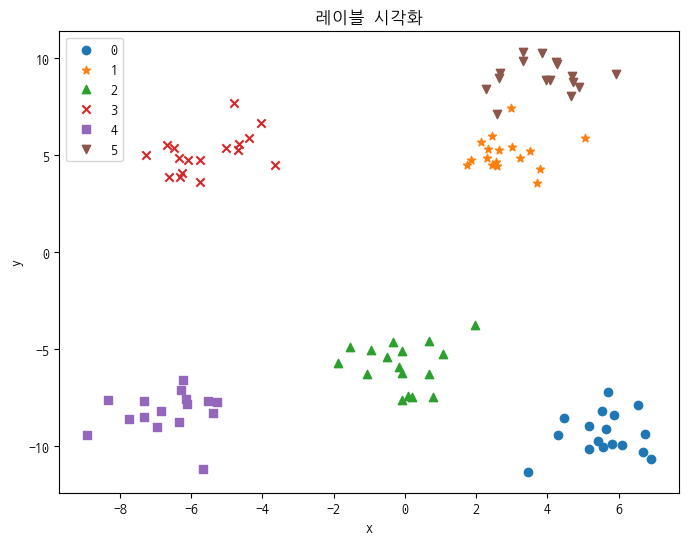

In [9]:
plt.figure(figsize=(8, 6))
markers = ['o', '*', '^', 'x', 's', 'v']

for i in set(x_train_df.label):
    df_index = x_train_df[x_train_df.label == i] # 데이터의 레이블 별로 데이터를 분할한다.
    x = df_index.x # 학습 데이터의 첫 번째 성분 벡터를 추출한다.
    y = df_index.y # 학습 데이터의 두 번째 성분 벡터를 추출한다.
    plt.scatter(x=x, y=y, marker=markers[i], label=i) # 산포도를 그린다.

plt.title('레이블 시각화')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

병합 계층 클러스터링 결과 시각화

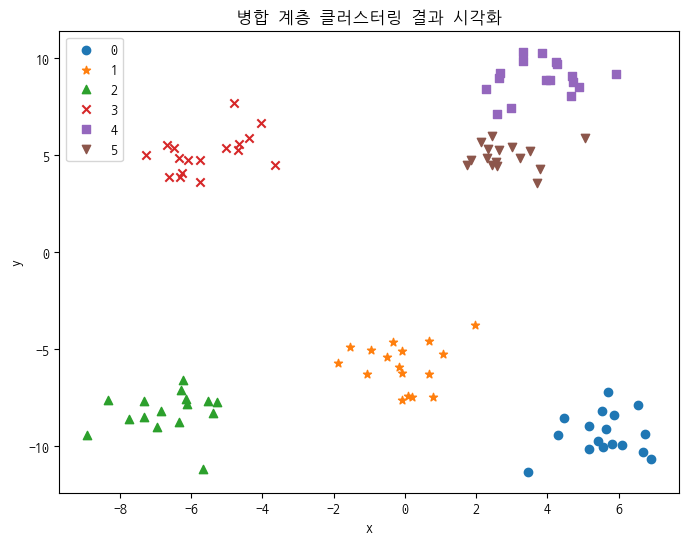

In [10]:
plt.figure(figsize=(8, 6))
markers = ['o', '*', '^', 'x', 's', 'v']

for i in set(x_train_df.cluster):
    df_index = x_train_df[x_train_df.cluster == i] # 클러스터링 결과 별로 데이터를 분할한다.
    x = df_index.x # 학습 데이터의 첫 번째 성분 벡터를 추출한다.
    y = df_index.y # 학습 데이터의 두 번째 성분 벡터를 추출한다.
    plt.scatter(x=x, y=y, marker=markers[i], label=i) # 산포도를 그린다.

plt.title('병합 계층 클러스터링 결과 시각화')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

학습된 모델을 평가한다.

In [11]:
# silhouette_score() 메소드에 피쳐 데이터와 군집화 결과로 얻은 클러스터를 넘겨 실루엣 스코어를 평가한다.
sil_score = silhouette_score(x_train, cluster.labels_)
print(sil_score)

0.7000819727948289


덴드로그램(Dendrogram) 시각화

계층적 클러스터링 결과를 트리 구조로 나타낸 그림을 덴드로그램이라 한다.

In [12]:
x_train, y_train = datasets.make_blobs(n_samples=20, n_features=2, random_state=10)
print(x_train.shape, y_train.shape)
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete')
cluster.fit(x_train)
print(cluster.labels_)

(20, 2) (20,)
[19 17 15 14 13 11 18 16  9 10  7 12  6  5  8  3  4  1  2  0]


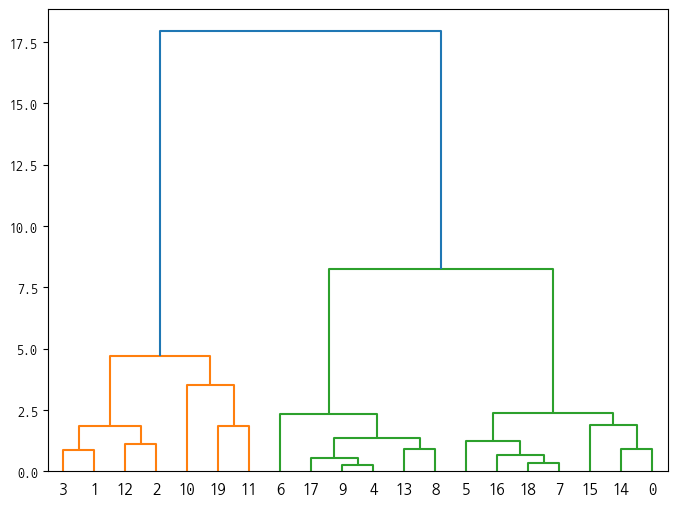

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(8, 6))
linked = linkage(x_train, 'complete')
dendrogram(linked, orientation='top', labels=cluster.labels_)
plt.show()